In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [5]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [25]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - Virus Host DB mapping

In [28]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_mammals_or_aves_w_seq.csv")

In [29]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [30]:
print("df size = ", df.shape)
df.head()

df size =  (456173, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023HI16,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MLPLETIGAIIALVIAGIIAIVVWTIVYIEYRKLLRQKKIDRLIDR...,82
1,UniRef90_A0A023HI18,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MRVKGIRKNCPHLWRWGTMLLGMLMICSAAEQLWVTVYYGVPVWKE...,851
2,UniRef90_A0A023HIB6,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MEPVDPNLEPWNHPGSKPTTACSKCYCKKCCWHCQLCFLKKGLGIS...,101
3,UniRef90_A0A023HQ48,28875,9534,Rotavirus A,species,Chlorocebus aethiops,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_A0A023HQ48,28875,9606,Rotavirus A,species,Homo sapiens,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218


In [7]:
column_stats(df, "virus_name")

Number of unique values = 1142
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            319333           70.002609
1                                     Hepatitis B virus             27870            6.109524
2                                   Hepacivirus hominis             18589            4.074989
3                                      Microviridae sp.              9544            2.092189
4                               Paslahepevirus balayani              9196            2.015902
5                                          Cowpox virus              8294            1.818170
6                                     Lyssavirus rabies              5388            1.181131
7                                           Rotavirus A              5276            1.156579
8                         Simian immunodeficiency virus              4106            0.900097
9                            

In [8]:
column_stats(df, "virus_host_name")

Number of unique values = 330
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                 376246                82.478796
1                 Pan troglodytes                  17892                 3.922196
2                      Bos taurus                   8259                 1.810497
3            Chlorocebus aethiops                   8111                 1.778054
4                      Sus scrofa                   3833                 0.840251
5                   Gallus gallus                   1877                 0.411467
6                    Mus musculus                   1827                 0.400506
7                     Felis catus                   1797                 0.393929
8                  Paguma larvata                   1642                 0.359951
9                  Macaca mulatta                   1462                 0.320492
10              Rattus norvegicus                   1376            

min seq len = 11
max seq len = 7217


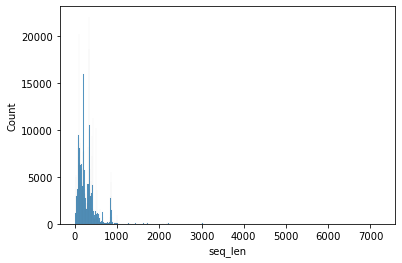

     start     end   count  percentage
0     11.0   611.5  423103   92.750557
1    611.5  1212.0   29541    6.475833
2   1212.0  1812.5    1690    0.370473
3   1812.5  2413.0     902    0.197732
4   2413.0  3013.5     571    0.125172
5   3013.5  3614.0     251    0.055023
6   3614.0  4214.5      45    0.009865
7   4214.5  4815.0      28    0.006138
8   4815.0  5415.5       2    0.000438
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5      11    0.002411
11  6616.5  7217.0      29    0.006357


In [31]:
print_seq_len_histogram(df, n_bins=12)

# UniRef90 - UniProt mapping


In [20]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_uniprot_hosts_pruned_metadata_species_mammals_or_aves_w_seq.csv")

In [21]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [22]:
print("df size = ", df.shape)
df.head()

df size =  (370517, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_L0BZH8,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTVKIGGQXXEALLDTGADDTVLEDINLPGKWKPXM...,366
1,UniRef90_L0BZI0,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEDMSLPGRWKPKM...,340
2,UniRef90_L0BZI1,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELENEGKISKIGPENPYNTPVFAIKKKNSTKWRKVVDFRELNKRTQ...,199
3,UniRef90_L0BZI3,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,PQITLWQRPIVTIKVGGQLKEALLDTGADDTVLEEMXLPGXWKPKM...,366
4,UniRef90_L0BZI5,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,ELEKEGKISKIGPENPYNTPIFAIKKKNSXKWRKXVDFRELNKRTQ...,199


In [23]:
column_stats(df, "virus_name")

Number of unique values = 222
                                            virus_name  virus_name_count  virus_name_percent
0                       Human immunodeficiency virus 1            318863           86.058939
1                                    Hepatitis B virus             27783            7.498441
2                              Paslahepevirus balayani              6494            1.752686
3                            African swine fever virus              4282            1.155682
4                                         Cowpox virus              2274            0.613737
5                        Simian immunodeficiency virus              2004            0.540866
6                       Human immunodeficiency virus 2              1599            0.431559
7                                            Orf virus               969            0.261526
8                                      Monkeypox virus               712            0.192164
9                                Hepatit

In [24]:
column_stats(df, "virus_host_name")

Number of unique values = 139
                virus_host_name  virus_host_name_count  virus_host_name_percent
0                  Homo sapiens                 338132                91.259510
1               Pan troglodytes                  16951                 4.574959
2                    Sus scrofa                   2547                 0.687418
3                  Mus musculus                   1251                 0.337636
4        Potamochoerus larvatus                   1044                 0.281768
5      Phacochoerus aethiopicus                   1044                 0.281768
6        Phacochoerus africanus                   1044                 0.281768
7                 Gallus gallus                    834                 0.225091
8          Chlorocebus aethiops                    828                 0.223472
9         Cercopithecus hamlyni                    815                 0.219963
10        Bandicota bengalensis                    812                 0.219153
11        

min seq len = 11
max seq len = 7217


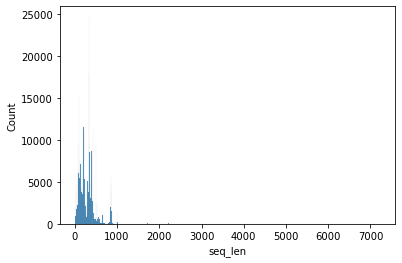

     start     end   count  percentage
0     11.0   611.5  343915   92.820302
1    611.5  1212.0   25516    6.886594
2   1212.0  1812.5     608    0.164095
3   1812.5  2413.0     335    0.090414
4   2413.0  3013.5      97    0.026180
5   3013.5  3614.0      14    0.003779
6   3614.0  4214.5      16    0.004318
7   4214.5  4815.0      10    0.002699
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001619


In [27]:
print_seq_len_histogram(df, n_bins=12)